### Worksheet 

The following questions will be centred around creating different plots - the answers will be entirely subjective for the most part, with how you approach the problem entirely up to personal preference. 

### Question 1

Create a simple lineplot of cumulative coronavirus deaths in Ireland vs. United Kingdom using the following [data](https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_time.csv). Be sure to label the x axis with dates (Last_update object). 


If this looks a little hard to read, try to adjust the scale (maybe plot on a log scale?). 


**Hint - use np.log() for transformations if using matplotlib**

In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as mpl
mpl.use(['classic','ggplot'])
url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_time.csv'
df=pd.read_csv(url,index_col=0)


print(df.index.values)


 # print(np.unique(df.index.values))

['Afghanistan' 'Afghanistan' 'Afghanistan' ... 'US' 'US' 'US']


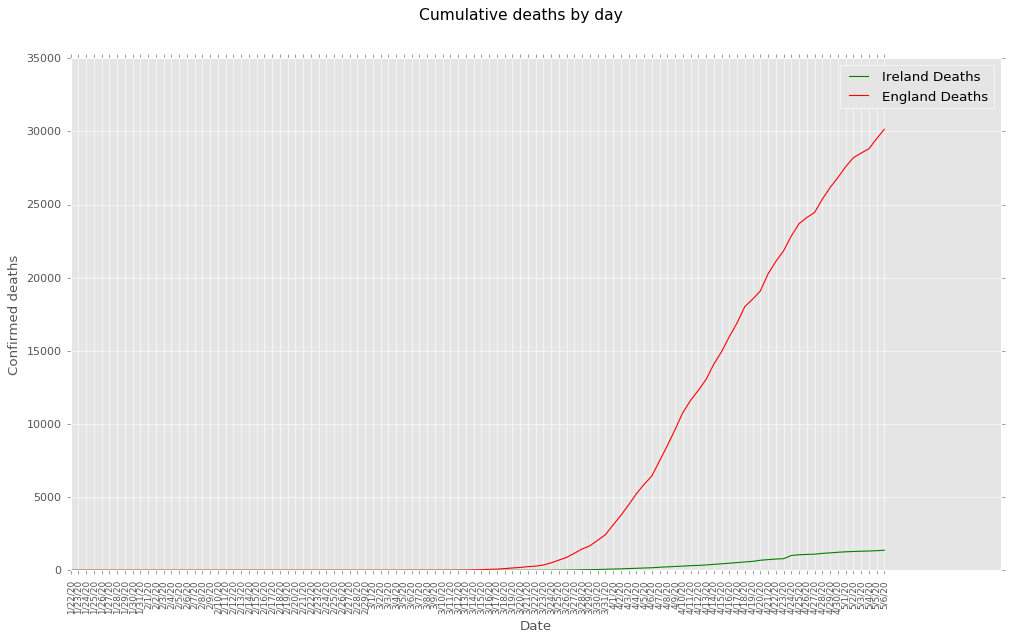

In [12]:
# plot with no scaling 


# get necessary data 
ireland_corona_data = df.loc['Ireland']

england_corona_data = df.loc['United Kingdom']



ire_deaths=ireland_corona_data['Deaths'].values # this converts everything to a numpy array 
eng_deaths=england_corona_data['Deaths'].values # this does the same
date_index=ireland_corona_data['Last_Update'].values # get the date index 
ind=np.arange(len(date_index)) # this is for the xticks part 
fig,ax=plt.subplots(figsize=(15,8)) # declare the size and fig, ax

ax.plot(ire_deaths,c='green',label='Ireland Deaths')
ax.plot(eng_deaths,c='red',label='England Deaths')
ax.set_xlabel('Date')
ax.set_ylabel('Confirmed deaths')
fig.suptitle('Cumulative deaths by day',fontsize=14)
ax.legend() # say we want the deaths 
ax.set_xticks(ind)
_=ax.set_xticklabels(date_index,rotation=90,fontsize=8) # rotation makes it easier to read 
# we also assign the xticklabels to a variable so they dont show up on the screen in the output 

/home/shane/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/shane/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


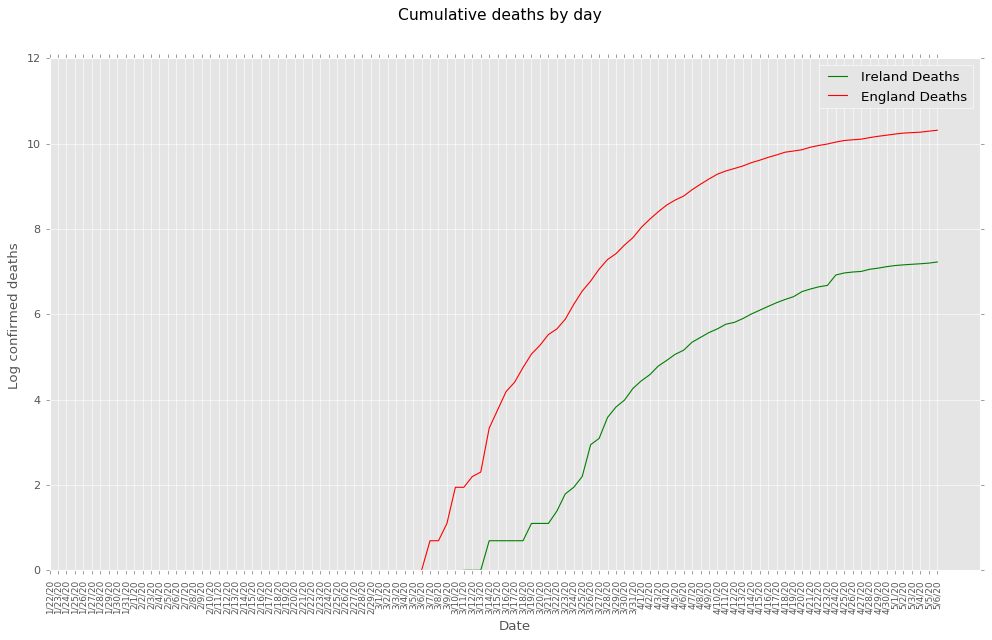

In [13]:
# with log scaling 
fig,ax=plt.subplots(figsize=(15,8))
ax.plot(np.log(ire_deaths),c='green',label='Ireland Deaths')
ax.plot(np.log(eng_deaths),c='red',label='England Deaths')
ax.set_xlabel('Date')
ax.set_ylabel('Log confirmed deaths')
fig.suptitle('Cumulative deaths by day',fontsize=14)
ax.legend() # say we want the deaths 
ax.set_xticks(ind)
_=ax.set_xticklabels(date_index,rotation=90,fontsize=8)

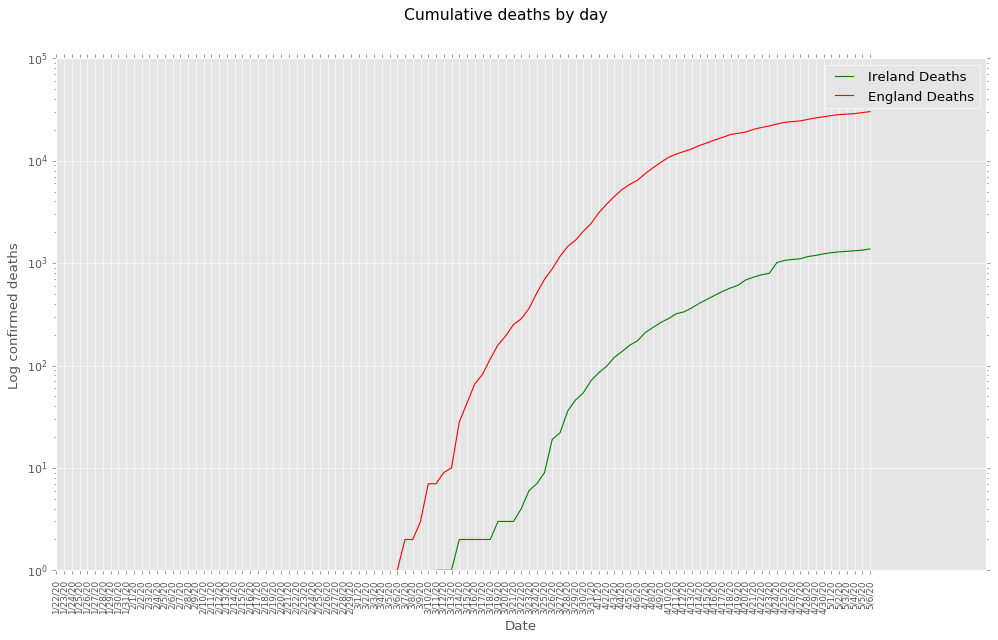

In [15]:
# or you can do this 
fig,ax=plt.subplots(figsize=(15,8))
ax.plot(ire_deaths,c='green',label='Ireland Deaths')
ax.plot(eng_deaths,c='red',label='England Deaths')
ax.set_xlabel('Date')
ax.set_ylabel('Log confirmed deaths')
fig.suptitle('Cumulative deaths by day',fontsize=14)
ax.legend() # say we want the deaths 
ax.set_xticks(ind)

### important bit 

ax.set_yscale('log')
_=ax.set_xticklabels(date_index,rotation=90,fontsize=8)

Try adding another country to this comparison - I would suggest France

/home/shane/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/home/shane/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/home/shane/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


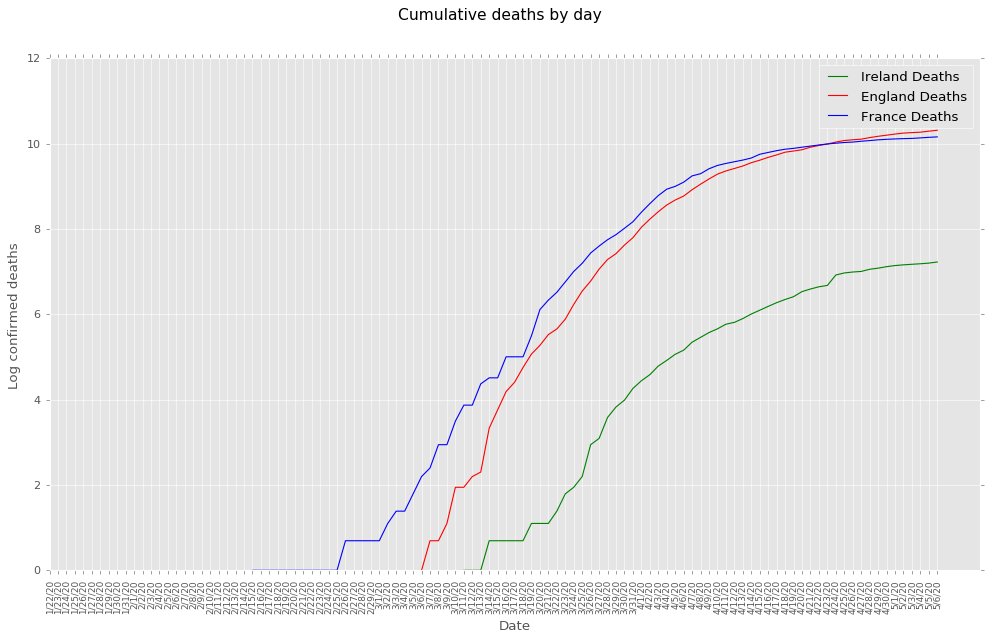

In [16]:
#solution 

# get another country in the same way 
france_corona_cases=df.loc['France']
france_deaths=france_corona_cases['Deaths'].values
#print(us_deaths)

fig,ax=plt.subplots(figsize=(15,8))

ax.plot(np.log(ire_deaths),c='green',label='Ireland Deaths')
ax.plot(np.log(eng_deaths),c='red',label='England Deaths')
ax.plot(np.log(france_deaths),c='blue',label='France Deaths')
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Log confirmed deaths')
fig.suptitle('Cumulative deaths by day',fontsize=14)
ax.set_xticks(ind)
_=ax.set_xticklabels(date_index,rotation=90,fontsize=8)



### Question 2 


Create a gridded set of plots to visualise the relationship between sepal length and sepal width across 3 species and in all species using the iris [dataset](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv). 

**Note - if using matplotlib with plt.subplots, you'll have to refer to declared axes like this - 
`fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2)` where the first set of axes (ax1 and ax2) refer to the first row and the second (ax3 and ax4) refer to the second row, and so get their own set of brackets**

In [21]:
# solution

iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
iris
print(iris['species'].unique()) # just so you know the exact names to filter on 

['setosa' 'versicolor' 'virginica']


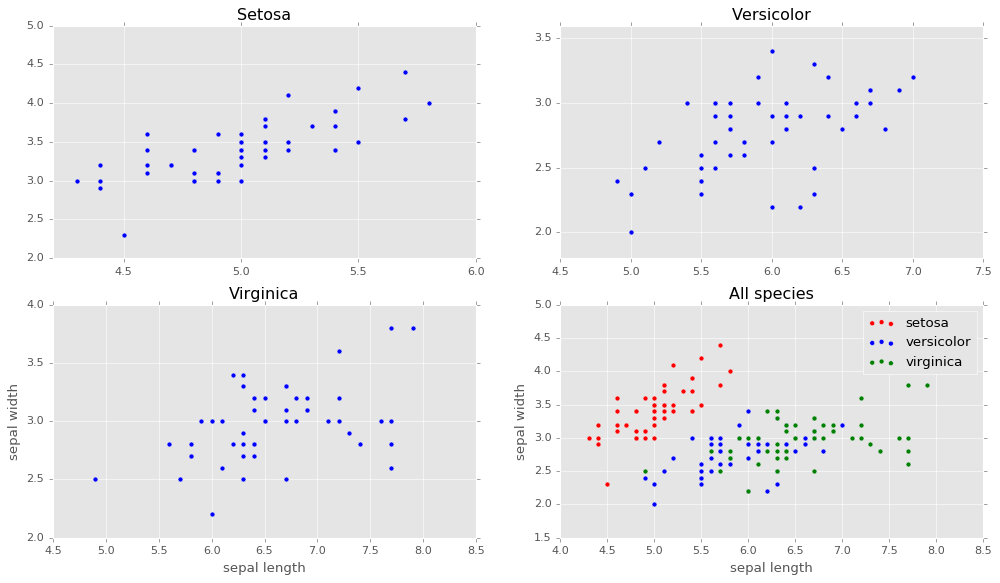

In [23]:

# create a function just because it is easier 
def filter_func_species(query):
    index_obj=iris['species']==query
    return(index_obj)

iris_setosa=iris[filter_func_species('setosa')]
iris_versicolor=iris[filter_func_species('versicolor')]
iris_virginica=iris[filter_func_species('virginica')]

fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2,figsize=(15,8))

ax1.scatter(iris_setosa['sepal_length'].values,
            iris_setosa['sepal_width'].values)

ax1.set_title('Setosa')


ax2.scatter(iris_versicolor['sepal_length'].values,
            iris_versicolor['sepal_width'].values)

ax2.set_title('Versicolor')


ax3.scatter(iris_virginica['sepal_length'].values,
            iris_virginica['sepal_width'].values)
ax3.set_xlabel('sepal length')
ax3.set_ylabel('sepal width')
ax3.set_title('Virginica')



ax4.scatter(iris_setosa['sepal_length'].values,
            iris_setosa['sepal_width'].values,c='red',label='setosa')
ax4.scatter(iris_versicolor['sepal_length'].values,
            iris_versicolor['sepal_width'].values,c='blue',label='versicolor')
ax4.scatter(iris_virginica['sepal_length'].values,
            iris_virginica['sepal_width'].values,c='green',label='virginica')

ax4.set_xlabel('sepal length')
ax4.set_ylabel('sepal width')

ax4.set_title('All species')
_=ax4.legend() # get rid of the annoying message 
#iris


### Question 3

Create a plot to visualise the differences between petal length across species.

Text(0.5, 0.98, 'Petal length across species')

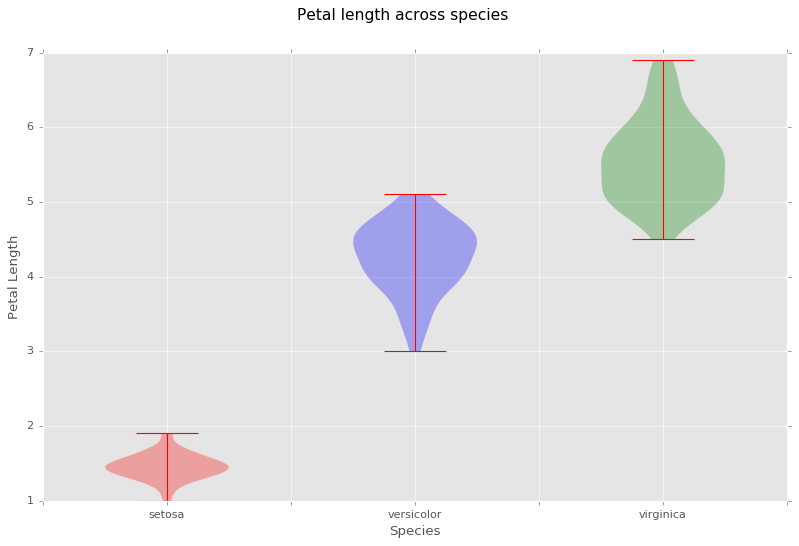

In [24]:
# you can do pleanty of things here - I quite like violin plots 

fig,ax=plt.subplots(figsize=(12,7))

data_to_plot=[iris_setosa['petal_length'].values,
              iris_versicolor['petal_length'].values,
              iris_virginica['petal_length'].values]
labels=['','setosa','','versicolor','','virginica']
colors=['red','blue','green']
ax.set_xticklabels(labels)
vplot=ax.violinplot(data_to_plot)
ax.set_ylabel('Petal Length')
ax.set_xlabel('Species')
for patch, color in zip(vplot['bodies'], colors):
        patch.set_facecolor(color)
fig.suptitle('Petal length across species',fontsize=14)



Do the same on a different scale (log)

Text(0.5, 0.98, 'Petal length across species')

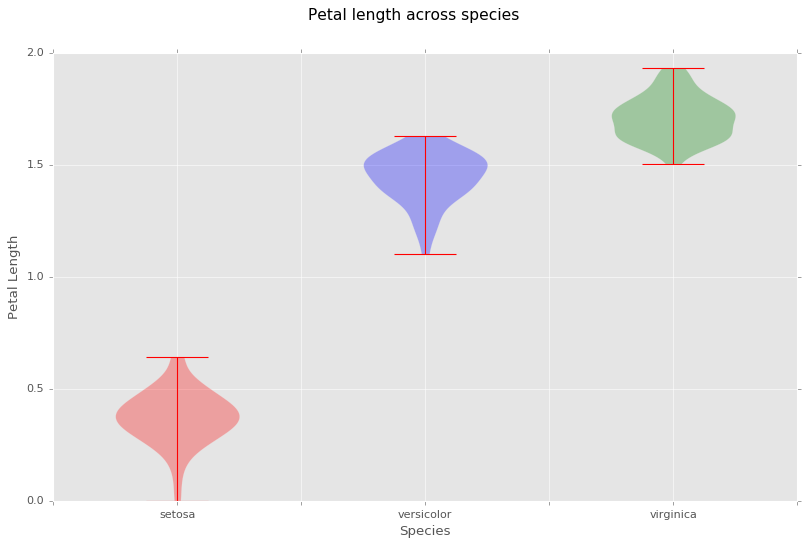

In [25]:
fig,ax=plt.subplots(figsize=(12,7))

data_to_plot=[np.log(iris_setosa['petal_length'].values),
              np.log(iris_versicolor['petal_length'].values),
              np.log(iris_virginica['petal_length'].values)]
labels=['','setosa','','versicolor','','virginica']
colors=['red','blue','green']
ax.set_xticklabels(labels)
vplot=ax.violinplot(data_to_plot)
ax.set_ylabel('Petal Length')
ax.set_xlabel('Species')
for patch, color in zip(vplot['bodies'], colors):
        patch.set_facecolor(color)
fig.suptitle('Petal length across species',fontsize=14)


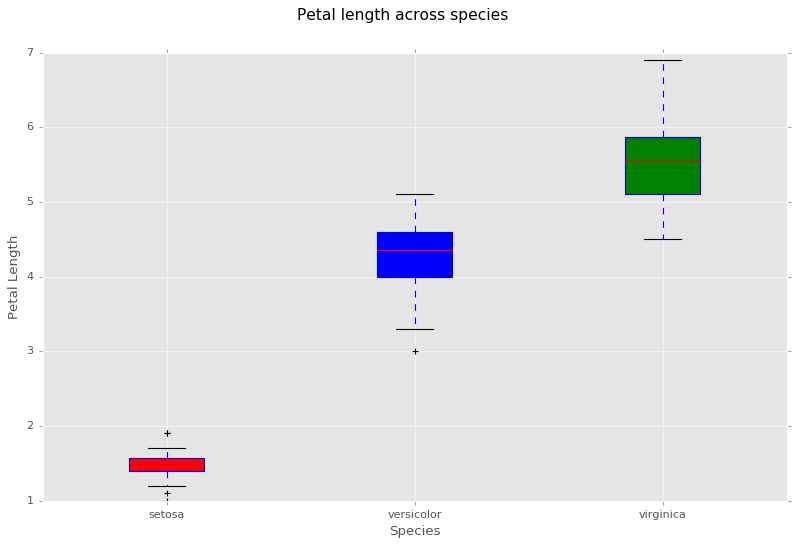

In [32]:
# for completeness sake, we can also do a boxplot 

fig,ax=plt.subplots(figsize=(12,7))

data_to_plot=[iris_setosa['petal_length'].values,
              iris_versicolor['petal_length'].values,
              iris_virginica['petal_length'].values]
labels=['setosa','versicolor','virginica']
colors=['red','blue','green']
ax.set_xticklabels(labels)

bplot=ax.boxplot(data_to_plot,patch_artist=True)
ax.set_ylabel('Petal Length')
ax.set_xlabel('Species')

# ax.set_yscale('log')
for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
_=fig.suptitle('Petal length across species',fontsize=14)
